[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


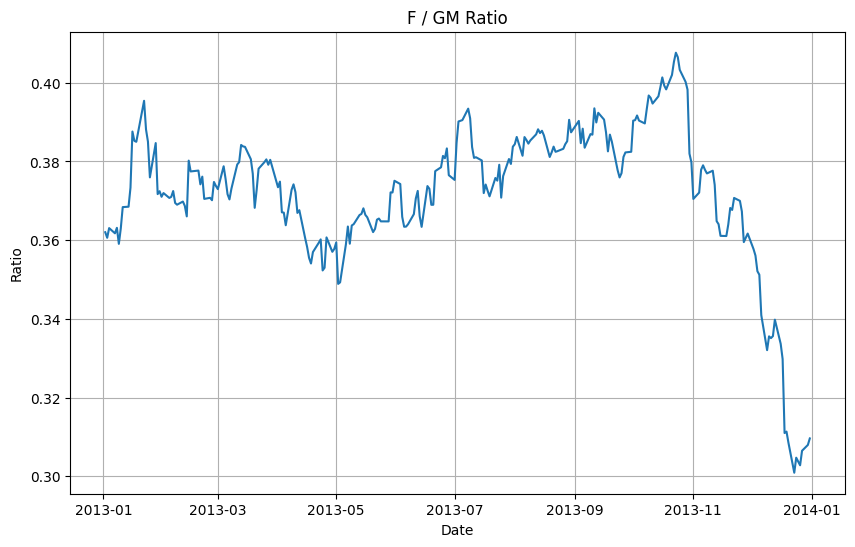

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2013-01-01'
    end_date = '2014-01-01'

    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1 = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2 = get_stock_data(stock_symbol_2, start_date, end_date)

    ratio_data = divide_stocks(stock_data_1, stock_data_2)

    title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    visualize_data(ratio_data, title)

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


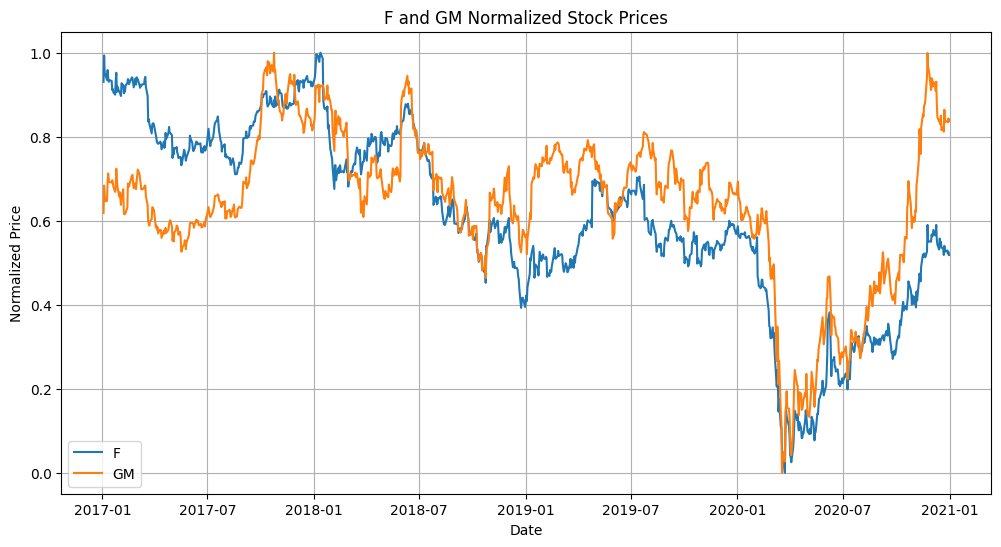

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def get_normalized_data(stock1, stock2, start_date, end_date):
    # Download historical stock prices
    df1 = yf.download(stock1, start=start_date, end=end_date)
    df2 = yf.download(stock2, start=start_date, end=end_date)

    # Merge the two dataframes on Date
    merged_df = pd.concat([df1['Close'], df2['Close']], axis=1)
    merged_df.columns = [stock1, stock2]

    # Handle missing values
    merged_df = merged_df.dropna()

    # Scale each stock's prices to range [0,1] based on its own min and max prices
    scaler = MinMaxScaler()
    normalized_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns, index=merged_df.index)

    return normalized_df

def visualize_data(data, stock1, stock2):
    plt.figure(figsize=(12,6))
    plt.plot(data[stock1], label=stock1)
    plt.plot(data[stock2], label=stock2)
    plt.title(f'{stock1} and {stock2} Normalized Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid()
    plt.show()

# Replace 'AAPL' and 'MSFT' with your desired stocks, and the dates with your desired range
normalized_data = get_normalized_data('F', 'GM', '2017-01-01', '2021-01-01')
visualize_data(normalized_data, 'F', 'GM')

# normalized_data = get_normalized_data('AAPL', 'MSFT', '2022-01-01', '2023-01-01')
# visualize_data(normalized_data, 'AAPL', 'MSFT')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


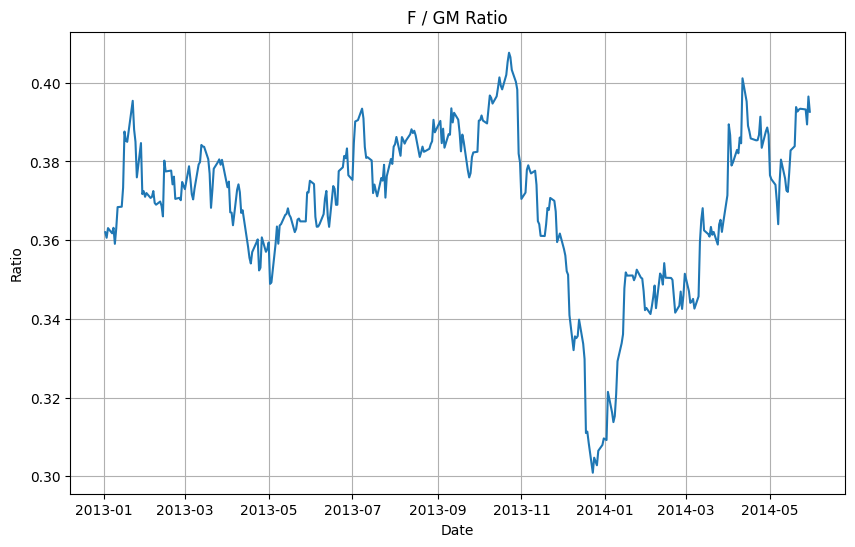

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2013-01-01'
    end_date = '2014-06-01'

    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1 = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2 = get_stock_data(stock_symbol_2, start_date, end_date)

    ratio_data = divide_stocks(stock_data_1, stock_data_2)

    title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    visualize_data(ratio_data, title)

if __name__ == "__main__":
    main()

/var/folders/hr/w0fr6n5n695g8ybn62pyltnm0000gn/T/ipykernel_16274/2249234495.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, parse_dates=['Date'])
/var/folders/hr/w0fr6n5n695g8ybn62pyltnm0000gn/T/ipykernel_16274/2249234495.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, parse_dates=['Date'])


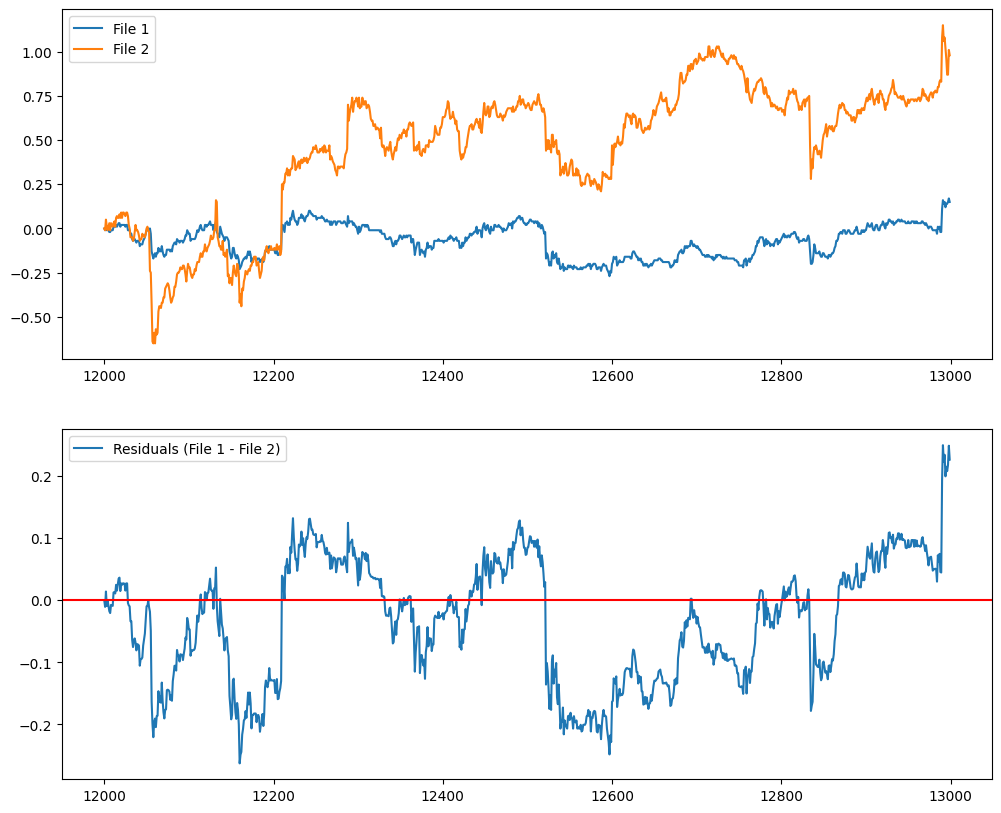

In [5]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

def normalize(df, start):
    # Subtract the first 'open' value from all 'open' values
    df['Close'] = df['Close'] - df['Close'].iloc[start]
    return df

def read_and_normalize(filename, start):
    # Read CSV
    df = pd.read_csv(filename, parse_dates=['Date'])
    # Normalize
    df = normalize(df, start)
    return df

def filter_by_index(df, start, end):
    return df.iloc[start:end]

def plot(df1, df2):
    fig, axs = plt.subplots(2, figsize=(12,10))
    
    # Main plot
    axs[0].plot(df1['Close'], label='File 1')
    axs[0].plot(df2['Close'], label='File 2')
    axs[0].legend()
    
    # Residual plot
    # residuals = df1['close'] - df2['close']

    df = pd.DataFrame(index=df1.index)
    df["F"] = df1['Close']
    df["GM"] = df2['Close']
    model = sm.OLS(df["F"], df["GM"]) 
    res = model.fit()
    beta_hr = res.params[0]
    df["res"] = df["F"] - beta_hr * df["GM"]

    axs[1].plot(df["res"], label='Residuals (File 1 - File 2)')
    axs[1].axhline(0, color='red') # Add horizontal line at y=0 for reference
    axs[1].legend()
    
    plt.show()

def main():
    start = 12000   # change these to the values you want
    end = 13000    # change these to the values you want
    # end = 19549    # change these to the values you want

    # Read and normalize data
    df1 = read_and_normalize('/Users/walkerhutchinson/Desktop/ThunderFund/meteor_code/CTG/DataDir/F.csv', start)
    df2 = read_and_normalize('/Users/walkerhutchinson/Desktop/ThunderFund/meteor_code/CTG/DataDir/GM.csv', start)

    # Filter by index
    df1 = filter_by_index(df1, start, end)
    df2 = filter_by_index(df2, start, end)

    # Plot
    plot(df1, df2)

if __name__ == "__main__":
    main()

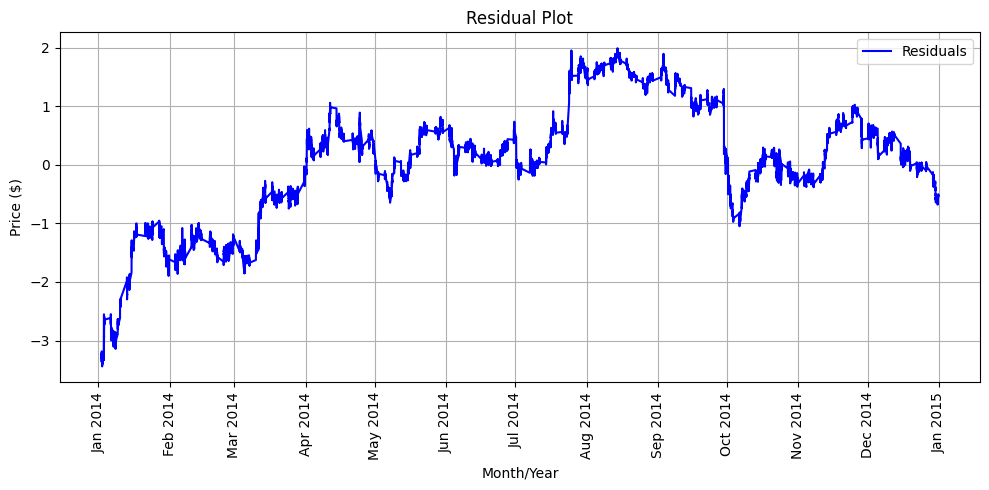

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as mdates

def plot_residuals(df):
    """
    Plot the residuals of the OLS procedure.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    
    months = mdates.MonthLocator()  # every month

    residuals = df["res"]
    ax.plot(df.index, residuals, label="Residuals", color='blue')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)

    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('Residual Plot')
    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

def compute_residuals_from_csv():

    # Read the CSV
    ticker_data_1 = pd.read_csv("/Users/walkerhutchinson/Desktop/CODE/z_CPED/DataDir/F.csv", index_col=0, parse_dates=True)
    ticker_data_2 = pd.read_csv("/Users/walkerhutchinson/Desktop/CODE/z_CPED/DataDir/GM.csv", index_col=0, parse_dates=True)

    df = pd.DataFrame(index=ticker_data_1.index)

    df["F"] = ticker_data_1["close"]
    df["GM"] = ticker_data_2["close"]

    # For this example, I'm assuming that you're comparing the 'close' values to itself.
    # If you have two tickers in the same CSV, the code would need to be adjusted.
    model = sm.OLS(df["F"], df["GM"]) 
    res = model.fit()
    beta_hr = res.params[0]

    # Calculate the residuals of the linear combination
    df["res"] = df["F"] - beta_hr * df["GM"]
    
    # Plot the residuals
    plot_residuals(df)

# Use the function to compute and plot residuals from a given CSV path
compute_residuals_from_csv()

In [8]:
# import os
# import imageio

# def create_video(image_folder, video_name):
#     images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
#     images.sort()  # To make sure images are in the correct order

#     frame = imageio.imread(os.path.join(image_folder, images[0]))
#     height, width, layers = frame.shape

#     video = imageio.get_writer(video_name, fps=5)  # Change fps (frames per second) to your desired value

#     for image in images:
#         video.append_data(imageio.imread(os.path.join(image_folder, image)))

#     video.close()


# image_folder = '/Users/walkerhutchinson/Desktop/Intraday_pair2'  # Path where images are stored
# video_name = '/Users/walkerhutchinson/Desktop/FPairGM.mp4'  # Output video file path

# create_video(image_folder, video_name)

Residual converges past -3 on 2014-01-03 10:06:00: -3.041546032253647
Residual diverges past -3 on 2014-01-06 15:55:00: -2.9782793885911847
Residual converges past -3 on 2014-01-06 15:56:00: -3.0008157553644867
Residual diverges past -3 on 2014-01-07 09:31:00: -2.939656672297737
Residual converges past -3 on 2014-01-07 09:48:00: -3.0140460667599527
Residual diverges past -3 on 2014-01-07 09:49:00: -2.9973619750666263
Residual converges past -3 on 2014-01-07 10:07:00: -3.0076036446088192
Residual diverges past -3 on 2014-01-07 12:07:00: -2.9971437744268226
Residual converges past -3 on 2014-01-07 12:10:00: -3.0040278661201487
Residual diverges past -3 on 2014-01-07 12:14:00: -2.999849077195716
Residual converges past -3 on 2014-01-07 12:16:00: -3.000349030658926
Residual diverges past -3 on 2014-01-07 12:18:00: -2.993064985502393
Residual converges past -3 on 2014-01-07 12:20:00: -3.008428804876244
Residual diverges past -3 on 2014-01-07 12:21:00: -2.9994384716579336
Residual converges 

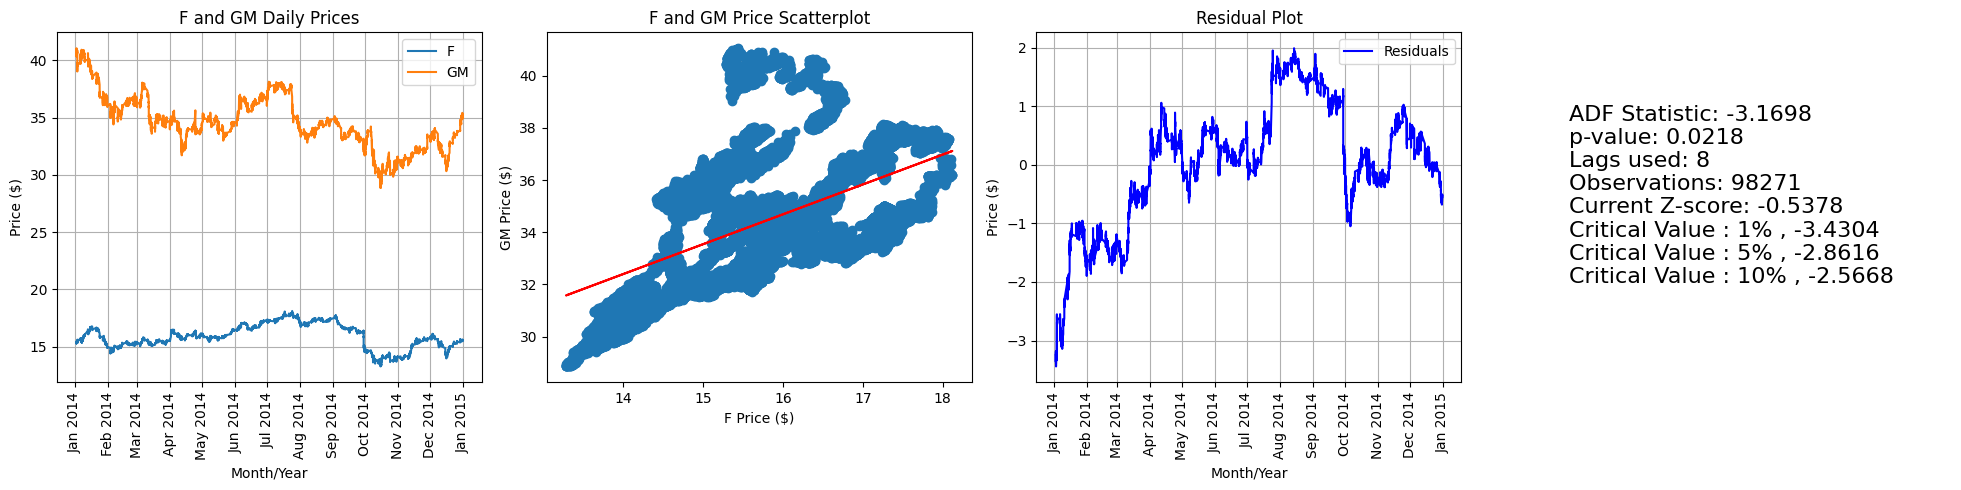

In [9]:
from pandas.plotting import register_matplotlib_converters
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt, timedelta
import statsmodels.tsa.stattools as ts
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pprint
import sys
import os

register_matplotlib_converters()

def plot_price_series(df, ts1, ts2, ax):
    months = mdates.MonthLocator()  # every month
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('%s and %s Daily Prices' % (ts1, ts2))
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=90)

def plot_scatter_series(df, ts1, ts2, ax):
    ax.set_xlabel('%s Price ($)' % ts1)
    ax.set_ylabel('%s Price ($)' % ts2)
    ax.set_title('%s and %s Price Scatterplot' % (ts1, ts2))
    ax.scatter(df[ts1], df[ts2])
    model = np.polyfit(df[ts1], df[ts2], 1)
    predicted = np.poly1d(model)
    ax.plot(df[ts1], predicted(df[ts1]), color='red')

def plot_residuals(df, ax):
    months = mdates.MonthLocator()  # every month
    residuals = df["res"]
    ax.plot(df.index, residuals, label="Residuals", color='blue')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('Residual Plot')
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=90)
    epsilon = 0.1
    last_value = residuals[0]
    for date, value in zip(df.index[1:], residuals[1:]):
        if abs(value) <= epsilon:
            continue
        elif (last_value < 0 and value > 0) or (last_value > 0 and value < 0):
            print(f"Residual crosses zero on {date}")

        elif (last_value < -1 and value > -1):
            print(f"Residual converges past -1 on {date}:", last_value)
        elif (last_value > -1 and value < -1):
            print(f"Residual diverges past -1 on {date}:", last_value)

        elif (last_value > 1 and value < 1):
            print(f"Residual converges past 1 on {date}:", last_value)
        elif (last_value < 1 and value > 1):
            print(f"Residual diverges past 1 on {date}:", last_value)

        elif (last_value < -2 and value > -2):
            print(f"Residual converges past -2 on {date}:", last_value)
        elif (last_value > -2 and value < -2):
            print(f"Residual diverges past -2 on {date}:", last_value)

        elif (last_value > 2 and value < 2):
            print(f"Residual converges past 2 on {date}:", last_value)
        elif (last_value < 2 and value > 2):
            print(f"Residual diverges past 2 on {date}:", last_value)

        elif (last_value < -3 and value > -3):
            print(f"Residual converges past -3 on {date}:", last_value)
        elif (last_value > -3 and value < -3):
            print(f"Residual diverges past -3 on {date}:", last_value)

        elif (last_value > 3 and value < 3):
            print(f"Residual converges past 3 on {date}:", last_value)
        elif (last_value < 3 and value > 3):
            print(f"Residual diverges past 3 on {date}:", last_value)
            
        last_value = value

if __name__ == "__main__":
    # Set tickers
    ticker1 = "F"
    ticker2 = "GM"

    # Paths to your CSV files
    csv_path_1 = "/Users/walkerhutchinson/Desktop/CODE/z_CPED/DataDir/F.csv"
    csv_path_2 = "/Users/walkerhutchinson/Desktop/CODE/z_CPED/DataDir/GM.csv"

    # Read data from the CSV files
    ticker_data_1 = pd.read_csv(csv_path_1, index_col="timestamp", parse_dates=True)
    ticker_data_2 = pd.read_csv(csv_path_2, index_col="timestamp", parse_dates=True)
    
    # Place them into the Pandas DataFrame format
    df = pd.DataFrame(index=ticker_data_1.index)
    df[ticker1] = ticker_data_1["close"]
    df[ticker2] = ticker_data_2["close"]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    plot_price_series(df, ticker1, ticker2, axs[0])
    plot_scatter_series(df, ticker1, ticker2, axs[1])

    model = sm.OLS(df[ticker1], df[ticker2]) 
    res = model.fit()
    beta_hr = res.params[0]

    df["res"] = df[ticker1] - beta_hr * df[ticker2]
    
    plot_residuals(df, axs[2])
    cadf = ts.adfuller(df["res"])
    zscore = ((df["res"] - df["res"].mean())/ df["res"].std())[-1]
    cadf_text = f'ADF Statistic: {round(cadf[0], 4)} \np-value: {round(cadf[1],4)} \nLags used: {cadf[2]} \nObservations: {round(cadf[3],4)}\nCurrent Z-score: {round(zscore, 4)}\n'
    for i, val in enumerate(cadf[4].items()):
        cadf_text += f'Critical Value : {val[0]} , {round(val[1],4)} \n'
    axs[3].axis('off')
    axs[3].text(0.1, 0.5, cadf_text, horizontalalignment='left', verticalalignment='center', fontsize=16)
    plt.tight_layout()
    plt.show()

/var/folders/hr/w0fr6n5n695g8ybn62pyltnm0000gn/T/ipykernel_16274/3769634328.py:76: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ticker_data_1 = pd.read_csv(csv_path_1, index_col="Date", parse_dates=True)
/var/folders/hr/w0fr6n5n695g8ybn62pyltnm0000gn/T/ipykernel_16274/3769634328.py:77: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ticker_data_2 = pd.read_csv(csv_path_2, index_col="Date", parse_dates=True)


Residual crosses -3 on 20140103 10:05:00 US/Eastern: -3.065424801055464
Residual crosses -3 on 20140107 09:30:00 US/Eastern: -2.956877376800554
Residual crosses -3 on 20140107 10:05:00 US/Eastern: -3.0266878405147466
Residual crosses -3 on 20140107 12:10:00 US/Eastern: -2.9993405448469
Residual crosses -3 on 20140107 12:30:00 US/Eastern: -3.0072142409009732
Residual crosses -3 on 20140107 13:05:00 US/Eastern: -2.986393184885525
Residual crosses -3 on 20140107 13:10:00 US/Eastern: -3.0055721288700727
Residual crosses -3 on 20140107 13:15:00 US/Eastern: -2.995572128870073
Residual crosses -3 on 20140108 09:30:00 US/Eastern: -3.060498464962768
Residual crosses -3 on 20140108 10:05:00 US/Eastern: -2.9822879048082775
Residual crosses -3 on 20140108 12:15:00 US/Eastern: -3.007845760630614
Residual crosses -3 on 20140108 14:00:00 US/Eastern: -2.9932562886383387
Residual crosses -3 on 20140108 15:05:00 US/Eastern: -3.020308928676961
Residual crosses -3 on 20140108 15:20:00 US/Eastern: -2.98146

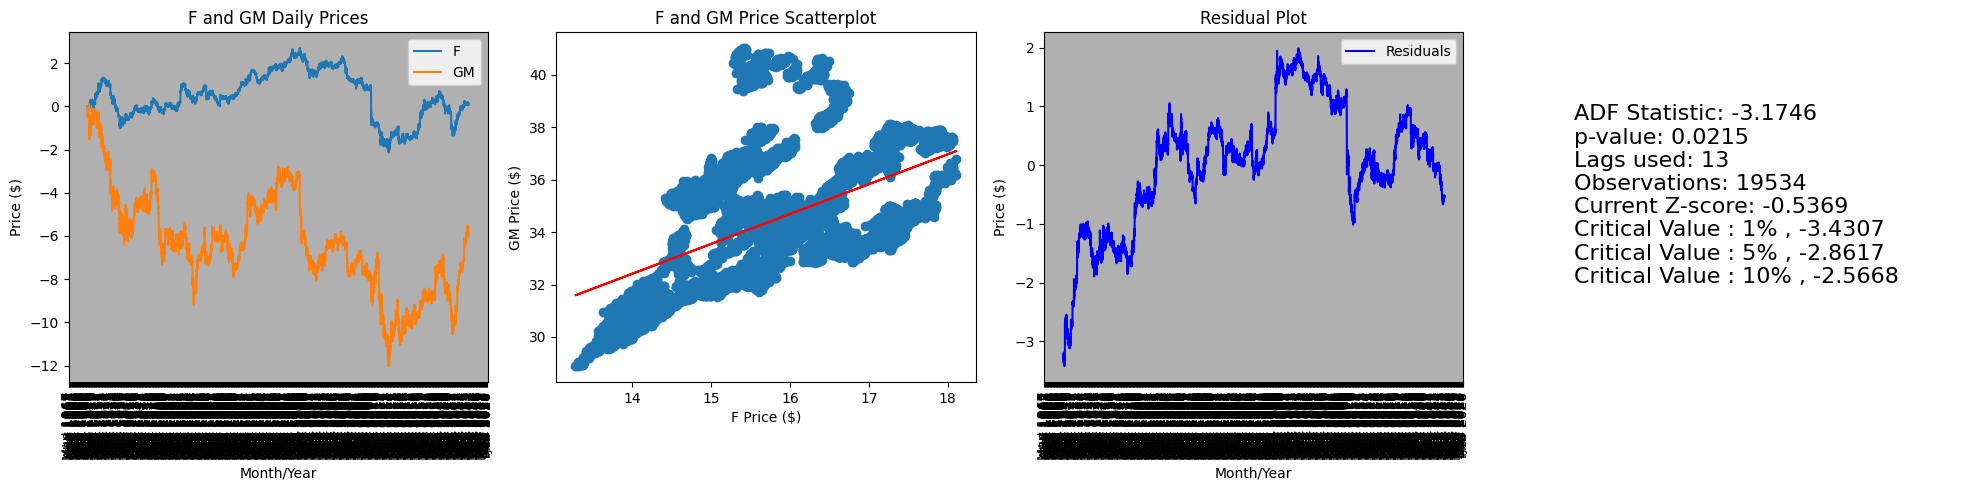

In [15]:
from pandas.plotting import register_matplotlib_converters
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt, timedelta
import statsmodels.tsa.stattools as ts
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pprint
import sys
import os

register_matplotlib_converters()

def normalize(df):
    # df['open'] = df['open'] - df['open'].iloc[start]
    df['Close'] = df['Close'] - df['Close'].iloc[0]
    return df

def plot_price_series(df, ts1, ts2, ax):
    months = mdates.MonthLocator()  # every month
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('%s and %s Daily Prices' % (ts1, ts2))
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=90)

def plot_scatter_series(df, ts1, ts2, ax):
    ax.set_xlabel('%s Price ($)' % ts1)
    ax.set_ylabel('%s Price ($)' % ts2)
    ax.set_title('%s and %s Price Scatterplot' % (ts1, ts2))
    ax.scatter(df[ts1], df[ts2])
    model = np.polyfit(df[ts1], df[ts2], 1)
    predicted = np.poly1d(model)
    ax.plot(df[ts1], predicted(df[ts1]), color='red')

def plot_residuals(df, ax):
    months = mdates.MonthLocator()  # every month
    residuals = df["res"]
    ax.plot(df.index, residuals, label="Residuals", color='blue')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('Residual Plot')
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=90)
    epsilon = 0.1
    last_value = residuals[0]
    for date, value in zip(df.index[1:], residuals[1:]):
        if abs(value) <= epsilon:
            continue
        elif (last_value < 0 and value > 0) or (last_value > 0 and value < 0):
            print(f"Residual crosses zero on {date}")
        if (last_value < -3 and value > -3) or (last_value > -3 and value < -3):
            print(f"Residual crosses -3 on {date}:", last_value)
        last_value = value

if __name__ == "__main__":
    # Set tickers
    ticker1 = "F"
    ticker2 = "GM"

    # Paths to your CSV files
    csv_path_1 = "/Users/walkerhutchinson/Desktop/ThunderFund/meteor_code/F_2014_5min.csv"
    csv_path_2 = "/Users/walkerhutchinson/Desktop/ThunderFund/meteor_code/GM_2014_5min.csv"

    # Reading the CSV files using pandas
    ticker_data_1 = pd.read_csv(csv_path_1, index_col="Date", parse_dates=True)
    ticker_data_2 = pd.read_csv(csv_path_2, index_col="Date", parse_dates=True)
    
    # Creating a DataFrame for other analyses with original data
    df = pd.DataFrame(index=ticker_data_1.index)
    df[ticker1] = ticker_data_1["Close"]
    df[ticker2] = ticker_data_2["Close"]

    # Creating a DataFrame for plotting with normalized data
    plot_df = pd.DataFrame(index=ticker_data_1.index)
    plot_df[ticker1] = normalize(ticker_data_1)["Close"]
    plot_df[ticker2] = normalize(ticker_data_2)["Close"]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Using the normalized data for the leftmost graph
    plot_price_series(plot_df, ticker1, ticker2, axs[0])
    
    # For other graphs, we use the original data
    plot_scatter_series(df, ticker1, ticker2, axs[1])

    model = sm.OLS(df[ticker1], df[ticker2]) 
    res = model.fit()
    beta_hr = res.params[0]

    df["res"] = df[ticker1] - beta_hr * df[ticker2]

    plot_residuals(df, axs[2])

    cadf = ts.adfuller(df["res"])
    zscore = ((df["res"] - df["res"].mean())/ df["res"].std())[-1]
    cadf_text = f'ADF Statistic: {round(cadf[0], 4)} \np-value: {round(cadf[1],4)} \nLags used: {cadf[2]} \nObservations: {round(cadf[3],4)}\nCurrent Z-score: {round(zscore, 4)}\n'
    for i, val in enumerate(cadf[4].items()):
        cadf_text += f'Critical Value : {val[0]} , {round(val[1],4)} \n'
    axs[3].axis('off')
    axs[3].text(0.1, 0.5, cadf_text, horizontalalignment='left', verticalalignment='center', fontsize=16)
    
    plt.tight_layout()
    plt.show()

# DAILY

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=F&outputsize=full&apikey=CZAVRQSYV9ZTXUOQ
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GM&outputsize=full&apikey=CZAVRQSYV9ZTXUOQ
Residual crosses zero on 2011-01-28 00:00:00
Residual crosses zero on 2011-03-21 00:00:00
Residual crosses zero on 2011-06-16 00:00:00
Residual crosses zero on 2011-08-23 00:00:00
Residual crosses zero on 2011-10-31 00:00:00
Residual crosses zero on 2011-11-01 00:00:00
Residual crosses zero on 2012-08-09 00:00:00
Residual crosses zero on 2012-08-14 00:00:00
Residual crosses zero on 2012-08-16 00:00:00
Residual crosses zero on 2012-12-26 00:00:00
Residual crosses zero on 2012-12-31 00:00:00
Residual crosses zero on 2013-01-11 00:00:00
Residual crosses zero on 2013-04-05 00:00:00
Residual crosses zero on 2013-04-08 00:00:00
Residual crosses zero on 2013-04-15 00:00:00
Residual crosses zero on 2013-05-31 00:00:00
Residual crosses zero on 2013-06-04 00:00:00
Residual cross

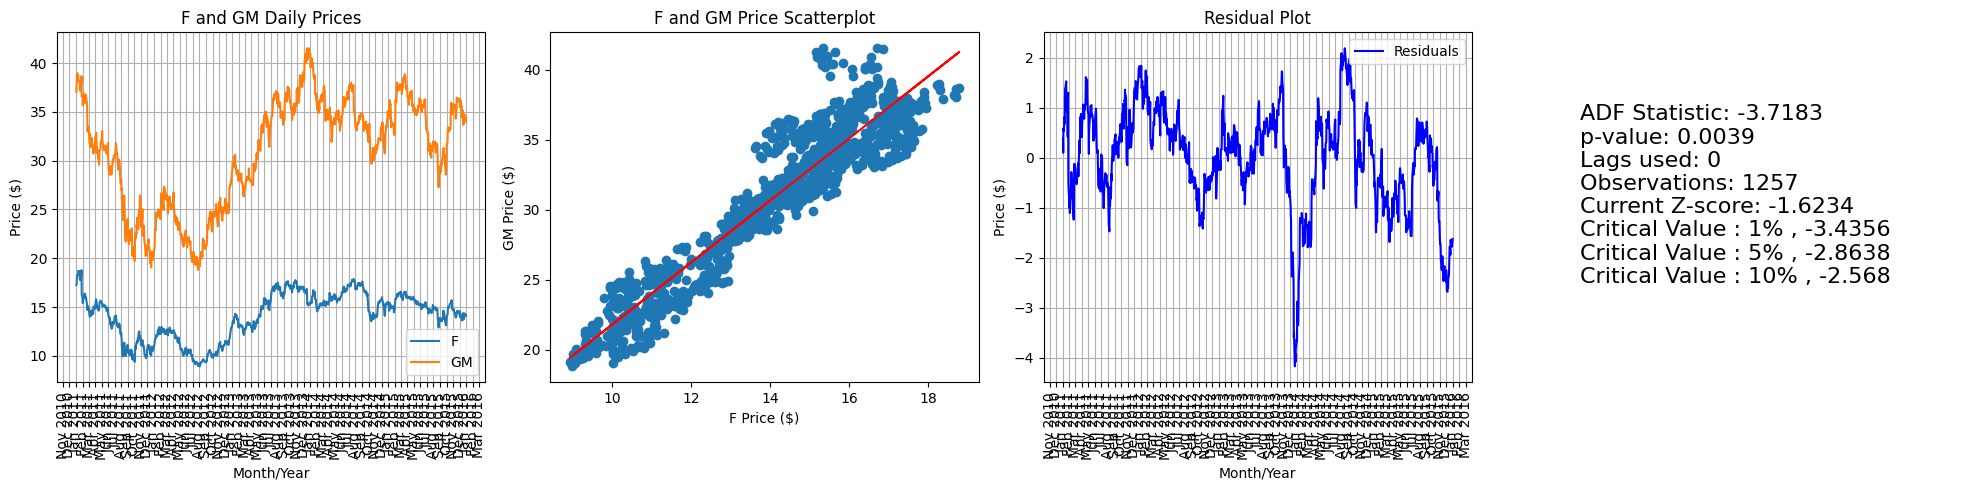

In [13]:
from pandas.plotting import register_matplotlib_converters
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt, timedelta
import statsmodels.tsa.stattools as ts
from datetime import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pprint
import sys
import os

register_matplotlib_converters()

sys.path.append("/Users/walkerhutchinson/Desktop/ThunderFund/meteor_code/get_hist_data") # https://stackoverflow.com/questions/17663634/no-module-named-using-sys-path-append
from a_v_data import AlphaVantage

def plot_price_series(df, ts1, ts2, ax):
    """
    Plot both time series on the same line graph.
    """
    months = mdates.MonthLocator()  # every month
    
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    # ax.set_xticklabels(mdates.DateFormatter('%b %Y'), rotation=90)
    ax.grid(True)
    
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('%s and %s Daily Prices' % (ts1, ts2))
    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, )
    # horizontalalignment='right')



def plot_scatter_series(df, ts1, ts2, ax):
    """
    Plot a scatter plot of both time series.
    """
    ax.set_xlabel('%s Price ($)' % ts1)
    ax.set_ylabel('%s Price ($)' % ts2)
    ax.set_title('%s and %s Price Scatterplot' % (ts1, ts2))
    ax.scatter(df[ts1], df[ts2])
    
    # Fit a linear regression model to the data and plot the line
    model = np.polyfit(df[ts1], df[ts2], 1)
    predicted = np.poly1d(model)
    ax.plot(df[ts1], predicted(df[ts1]), color='red')


# def plot_residuals(df, ax):
#     """
#     Plot the residuals of OLS procedure for both
#     time series.
#     """
#     months = mdates.MonthLocator()  # every month
    
#     ax.plot(df.index, df["res"], label="Residuals", color='blue')
#     ax.xaxis.set_major_locator(months)
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#     # ax.set_xticklabels(mdates.DateFormatter('%b %Y'), rotation=90)
#     ax.grid(True)
    
#     ax.set_xlabel('Month/Year')
#     ax.set_ylabel('Price ($)')
#     ax.set_title('Residual Plot')
#     ax.legend()

#     plt.setp(ax.get_xticklabels(), rotation=90, )
#     # horizontalalignment='right')

def plot_residuals(df, ax):
    """
    Plot the residuals of OLS procedure for both
    time series.
    """
    
    """ 
    In statistics and machine learning, a residual is the difference between the observed value and the predicted value of a variable. In other words, it's the error in your prediction.
    """
    months = mdates.MonthLocator()  # every month

    # residuals = df["res"]
    residuals = df["z-s"]
    ax.plot(df.index, residuals, label="Residuals", color='blue')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(True)

    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Price ($)')
    ax.set_title('Residual Plot')
    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90)

    # Check for residuals crossing or near zero
    epsilon = 0.1  # Define what you consider to be 'near zero'
    last_value = residuals[0]
    for date, value in zip(df.index[1:], residuals[1:]):
        if abs(value) <= epsilon:
            # print(f"Residual is near zero on {date}")
            continue
        elif (last_value < 0 and value > 0) or (last_value > 0 and value < 0):
            print(f"Residual crosses zero on {date}")

        if (last_value < -3 and value > -3) or (last_value > -3 and value < -3):
            print(f"Residual crosses -3 on {date}:", last_value)

        last_value = value

if __name__ == "__main__":
    # Create an AlphaVantage API instance
    av = AlphaVantage()

    # Set tickers
    ticker1 = "F"
    ticker2 = "GM"

    # Download ticker-data-1 and ticker-data-2 for the duration of 2015
    start_date = dt(2011, 1, 1)
    end_date = dt(2016, 1, 1)
    # start_date="2020-01-01", end_date="2021-01-01"
    ticker_data_1 = av.get_daily_historic_data(ticker1, start_date, end_date)
    ticker_data_2 = av.get_daily_historic_data(ticker2, start_date, end_date)

    # Place them into the Pandas DataFrame format
    df = pd.DataFrame(index=ticker_data_1.index)
    df[ticker1] = ticker_data_1["Close"]
    df[ticker2] = ticker_data_2["Close"]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Plot the two time series
    plot_price_series(df, ticker1, ticker2, axs[0])
    
    # Display a scatter plot of the two time series
    plot_scatter_series(df, ticker1, ticker2, axs[1])

    # Calculate optimal hedge ratio "beta" via Statsmodels
    model = sm.OLS(df[ticker1], df[ticker2]) 
    res = model.fit()
    beta_hr = res.params[0]

    # Calculate the residuals of the linear combination
    df["res"] = df[ticker1] - beta_hr * df[ticker2]

    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(df["res"])

    zscore = ((df["res"] - df["res"].mean())/ df["res"].std())[-1]
    df["z-s"] = ((df["res"] - df["res"].mean())/ df["res"].std())

    # Plot the residuals or zscore
    plot_residuals(df, axs[2])

    # Add the text to the fourth subplot
    cadf_text = f'ADF Statistic: {round(cadf[0], 4)} \np-value: {round(cadf[1],4)} \nLags used: {cadf[2]} \nObservations: {round(cadf[3],4)}\nCurrent Z-score: {round(zscore, 4)}\n'
    for i, val in enumerate(cadf[4].items()):
        cadf_text += f'Critical Value : {val[0]} , {round(val[1],4)} \n'

    axs[3].axis('off')
    axs[3].text(0.1, 0.5, cadf_text, horizontalalignment='left', verticalalignment='center', fontsize=16)

    plt.tight_layout()
    plt.show()
    # # Replace '/path/to/your/desktop' with the actual path to your desktop
    # plt.savefig('/Users/walkerhutchinson/Desktop/F GM Cointegration 2011 to 2023.png')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


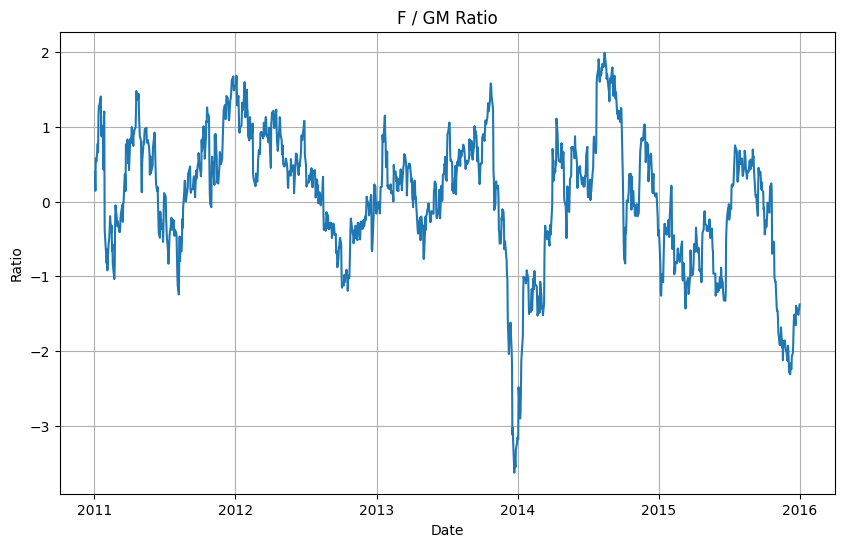

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(dates, data, title):
    
    # residuals = data["res"]    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, data)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2011-01-01'
    end_date = '2016-01-01'

    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1 = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2 = get_stock_data(stock_symbol_2, start_date, end_date)

    # # PANDAS STRUCTURE
    # df = pd.DataFrame(index=stock_data_1.index)
    # df[stock_symbol_1] = stock_data_1
    # df[stock_symbol_2] = stock_data_2
    # model = sm.OLS(df[stock_symbol_1], df[stock_symbol_2]) 
    # res = model.fit()
    # beta_hr = res.params[0]
    # df["res"] = df[stock_symbol_1] - beta_hr * df[stock_symbol_2]
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(df, title)


    # # NUMPY STRUCTURE
    stock_data_1_np = stock_data_1.values
    stock_data_2_np = stock_data_2.values

    model = sm.OLS(stock_data_1_np, stock_data_2_np) 
    res = model.fit()
    beta_hr = res.params[0]

    residuals = stock_data_1_np - beta_hr * stock_data_2_np
    title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'

    dates = stock_data_1.index
    visualize_data(dates, residuals, title)

    # 
    # 
    # A = np.vstack([stock_data_2, np.ones_like(stock_data_2)]).T
    # beta_hr, _ = np.linalg.lstsq(A, stock_data_1, rcond=None)[0]
    # residuals = stock_data_1 - beta_hr * stock_data_2
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(residuals, title)


    # NORMAL PYTHON STRUCTURE
    # model = sm.OLS(stock_data_1, stock_data_2)
    # res = model.fit()
    # beta_hr = res.params[0]
    # # Calculate the residuals of the linear combination
    # residuals = stock_data_1 - beta_hr * stock_data_2
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(residuals, title)


if __name__ == "__main__":
    main()

In [12]:
def __init__(self, bars, events, ols_window=50, zscore_low=0.4, zscore_high=3.0):

# GET DATA
x = self.bars.get_latest_bars_values(
self.pair[0], "Close", N=self.ols_window
)
y = self.bars.get_latest_bars_values(
self.pair[1], "Close", N=self.ols_window
)

def calculate_xy_signals(self, zscore_last, timestamp):
"""
Calculates the actual x, y signal pairings
to be sent to the signal generator.
Parameters
zscore_last - The current zscore to test against
"""
y_signal = None
x_signal = None
p0       = self.pair[0]
p1       = self.pair[1]
dt       = timestamp
hr       = abs(self.hedge_ratio)
# If we’re long the market and below the
# negative of the high zscore threshold
if zscore_last <= -self.zscore_high and not self.long_market:
self.long_market = True
y_signal = SignalEvent(p0, dt, 'SHORT', 1.0)
x_signal = SignalEvent(p1, dt, 'LONG', hr)

# If we’re long the market and between the
# absolute value of the low zscore threshold
if abs(zscore_last) <= self.zscore_low and self.long_market:
self.long_market = False
y_signal = SignalEvent(p0, dt, 'EXIT', 1.0)
x_signal = SignalEvent(p1, dt, 'EXIT', 1.0)

# If we’re short the market and above
# the high zscore threshold
if zscore_last >= self.zscore_high and not self.short_market:
self.short_market = True
y_signal = SignalEvent(p0, dt, 'LONG', 1.0)
x_signal = SignalEvent(p1, dt, 'SHORT', hr)

# If we’re short the market and between the
# absolute value of the low zscore threshold
if abs(zscore_last) <= self.zscore_low and self.short_market:
self.short_market = False
y_signal = SignalEvent(p0, dt, 'EXIT', 1.0)
x_signal = SignalEvent(p1, dt, 'EXIT', 1.0)

return y_signal, x_signal

if y is not None and x is not None:
if len(y) >= self.ols_window and len(x) >= self.ols_window: # Check that all window periods are available


xyt = self.bars.get_latest_bar_value( # LIST OF DATES
                                        symbol=self.pair[0], 
                                        value_type="name",
)

datetime_obj = self.parse_time_with_timezone(xyt) # FORMAT CURRENT DATE
""" datetime.datetime.time().strptime() """
# IF IN TRADING HOURS
if (datetime_obj.hour == 15 and datetime_obj.minute > 50) or (16 <= datetime_obj.hour < 24) or (0 <= datetime_obj.hour < 9) or (datetime_obj.hour == 9 and datetime_obj.minute < 30):
print("after 3:50 exiting positions")
if self.long_market:
    self.long_market = False
    self.events.put(SignalEvent(self.pair[0], datetime_obj, 'EXIT', 1.0))
    self.events.put(SignalEvent(self.pair[1], datetime_obj, 'EXIT', 1.0))
elif self.short_market:
    self.short_market = False
    self.events.put(SignalEvent(self.pair[0], datetime_obj, 'EXIT', 1.0))
    self.events.put(SignalEvent(self.pair[1], datetime_obj, 'EXIT', 1.0))

else:
    # LINEAR REG ALGO
    # Take the last 2 stock prices
    last_2_prices_x = x[-2:]
    last_2_prices_y = y[-2:]
    # Create an array of indices representing time for these prices
    time_indices_x = np.arange(len(x)-2, len(x))
    time_indices_y = np.arange(len(y)-2, len(y))
    # Perform linear regression
    model_x = LinearRegression()
    model_y = LinearRegression()
    model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
    model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)
    # Extract the slope
    slope_x = model_x.coef_[0]
    slope_y = model_y.coef_[0]
    
    signs_opposite = np.all(slope_x == -slope_y)
                        
    if signs_opposite: # IF ACTUALLY DIVERGING

        # Calculate the current hedge ratio using OLS
        self.hedge_ratio = sm.OLS(x, y).fit().params[0]
        # Calculate the current z-score of the residuals
        spread = x - self.hedge_ratio * y
        zscore_last = ((spread - spread.mean()) / spread.std())[-1]
        # Calculate signals and add to events queue
        y_signal, x_signal = self.calculate_xy_signals(zscore_last, datetime_obj)

        if y_signal is not None and x_signal is not None:
            self.events.put(y_signal)
            self.events.put(x_signal)
            self.all_traded_dates.append(datetime_obj)

IndentationError: expected an indented block after function definition on line 1 (3366504478.py, line 4)

pseudocode

get price list
-1 [price list] +1

check if in trading hours
    if not, if open positions, close

if diverging via linear reg algo
calc z score
calc signals(recent z-score, date)
if z-score < or > 
    enter/ exit



In [ ]:
model = sm.OLS(x, y)
res = model.fit()
beta_hr = res.params[0]

# Calculate the residuals of the linear combination
residuals = x - beta_hr * y

curr_residual = residuals[-1] * 10
last_residual = residuals[-2] * 10

# if not in trading hours
    # EXIT positions
# elif cross 0 
    # EXIT positions
# elif signs opposite
    # if cross 1
        # 


if (datetime_obj.hour == 15 and datetime_obj.minute > 50) or (16 <= datetime_obj.hour < 24) or (0 <= datetime_obj.hour < 9) or (datetime_obj.hour == 9 and datetime_obj.minute < 30):
    # exit all positions with 10 minutes left for the trading day
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=0, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

elif (last_residual < 0 and curr_residual > 0) or (last_residual > 0 and curr_residual < 0):
    # elif residual crosses zero
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=0, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

elif signs_opposite: 
if (last_residual > 1 and curr_residual < 1):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=1, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

if (last_residual > 2 and curr_residual < 2):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=1, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

if (last_residual > 3 and curr_residual < 3):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=1, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

if (last_residual < -1 and curr_residual > -1):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=2, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

if (last_residual < -2 and curr_residual > -2):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=2, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)

if (last_residual < -3 and curr_residual > -3):
    # Calculate signals and add to events queue
    p0_signal, p1_signal = self.calculate_p_signals(position_signal=2, timestamp=xyt)
    if p0_signal is not None and p1_signal is not None:
        self.events.put(p0_signal)
        self.events.put(p1_signal)


if position_signal == 0: # crosses 0
    self.long_market = False
    p0_signal = SignalEvent(
                            symbol=p0, 
                            datetime=timestamp, 
                            signal_type='EXIT', 
                            strength=1.0
    )
    p1_signal = SignalEvent(
                            symbol=p1, 
                            datetime=timestamp,
                            signal_type='EXIT', 
                            strength=1.0
    )

if position_signal == 1: # converges a positive residual
    self.long_market = True
    p0_signal = SignalEvent(
                            symbol=p0, 
                            datetime=timestamp,
                            signal_type='SHORT', 
                            strength=1.0
    )
    p1_signal = SignalEvent(
                            symbol=p1, 
                            datetime=timestamp,
                            signal_type='LONG', 
                            strength=1.0
    )
    
if position_signal == 2: # converges a negative residual
    self.short_market = True
    p0_signal = SignalEvent(
                            symbol=p0, 
                            datetime=timestamp, 
                            signal_type='LONG', 
                            strength= 1.0
    )
    p1_signal = SignalEvent(
                            symbol=p1, 
                            datetime=timestamp, 
                            signal_type='SHORT', 
                            strength=1.0
    )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


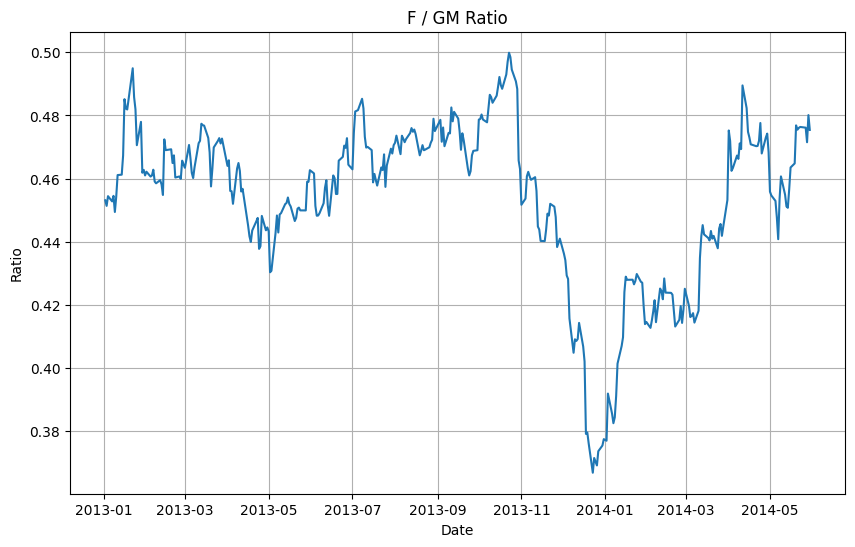

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2013-01-01'
    end_date = '2014-06-01'

    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1 = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2 = get_stock_data(stock_symbol_2, start_date, end_date)

    ratio_data = divide_stocks(stock_data_1, stock_data_2)

    title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    visualize_data(ratio_data, title)

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


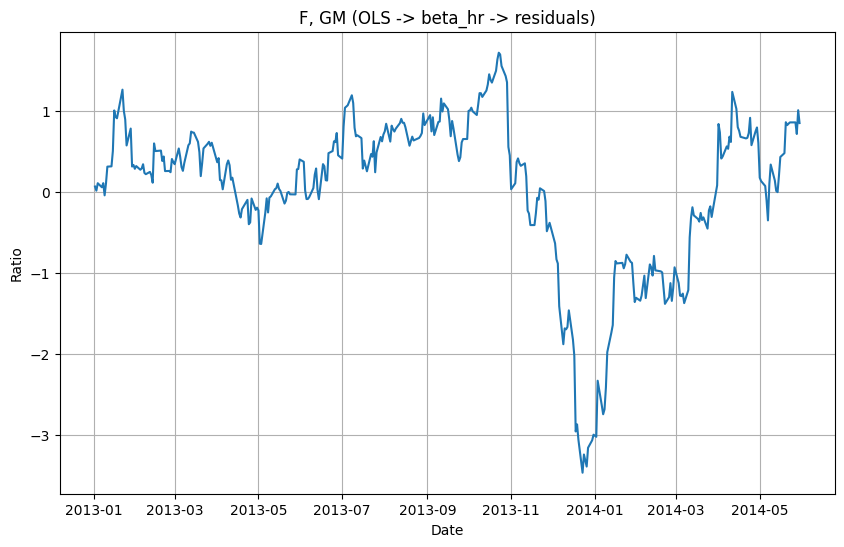

In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(dates, data, title):
    
    # residuals = data["res"]    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, data)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    # start_date = '2011-01-01'
    # end_date = '2016-01-01'
    start_date = '2013-01-01'
    end_date = '2014-06-01'
    
    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1_np = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2_np = get_stock_data(stock_symbol_2, start_date, end_date)

    # # PANDAS STRUCTURE
    # df = pd.DataFrame(index=stock_data_1.index)
    # df[stock_symbol_1] = stock_data_1
    # df[stock_symbol_2] = stock_data_2
    # model = sm.OLS(df[stock_symbol_1], df[stock_symbol_2]) 
    # res = model.fit()
    # beta_hr = res.params[0]
    # df["res"] = df[stock_symbol_1] - beta_hr * df[stock_symbol_2]
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(df, title)


    # # NUMPY STRUCTURE
    model = sm.OLS(stock_data_1_np, stock_data_2_np) 
    res = model.fit()
    beta_hr = res.params[0]
    residuals = stock_data_1_np - beta_hr * stock_data_2_np
    
    title = f'{stock_symbol_1}, {stock_symbol_2} (OLS -> beta_hr -> residuals)'

    dates = stock_data_1_np.index
    visualize_data(dates, residuals, title)

    # 
    # 
    # A = np.vstack([stock_data_2, np.ones_like(stock_data_2)]).T
    # beta_hr, _ = np.linalg.lstsq(A, stock_data_1, rcond=None)[0]
    # residuals = stock_data_1 - beta_hr * stock_data_2
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(residuals, title)


    # NORMAL PYTHON STRUCTURE
    # model = sm.OLS(stock_data_1, stock_data_2)
    # res = model.fit()
    # beta_hr = res.params[0]
    # # Calculate the residuals of the linear combination
    # residuals = stock_data_1 - beta_hr * stock_data_2
    # title = f'{stock_symbol_1} / {stock_symbol_2} Ratio'
    # visualize_data(residuals, title)


if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'numpy.float64'>
-0.10000038146972653


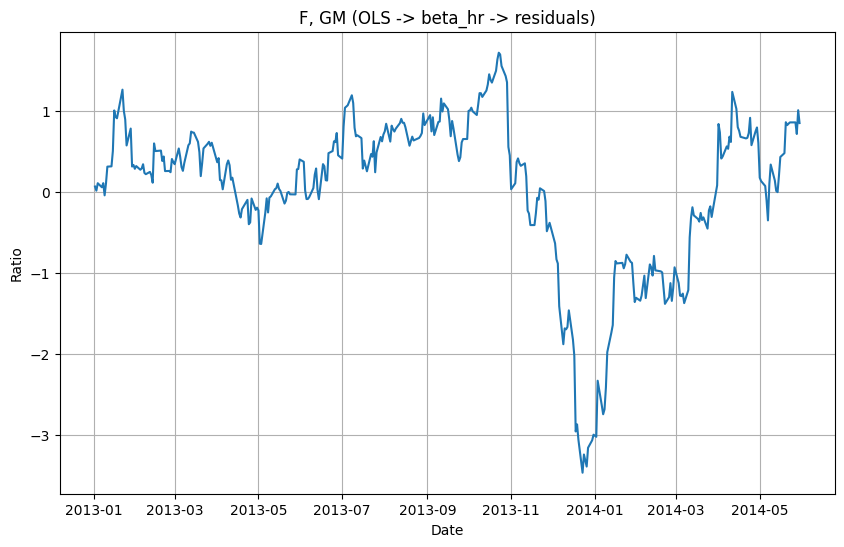

In [37]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def divide_stocks(stock_data_1, stock_data_2):
    return stock_data_1 / stock_data_2

def visualize_data(dates, data, title):
    
    # residuals = data["res"]    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, data)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.grid(True)
    plt.show()

def main():
    # Replace these variables with your desired values
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    # start_date = '2011-01-01'
    # end_date = '2016-01-01'
    start_date = '2013-01-01'
    end_date = '2014-06-01'
    
    # stock_symbol_1 = 'AAPL'
    # stock_symbol_2 = 'MSFT'
    # start_date = '2022-01-01'
    # end_date = '2023-01-01'


    stock_data_1_np = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2_np = get_stock_data(stock_symbol_2, start_date, end_date)

    last_2_prices_x = stock_data_1_np[-2:]
    last_2_prices_y = stock_data_2_np[-2:]

    # Create an array of indices representing time for these prices
    time_indices_x = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))
    time_indices_y = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))

    # Perform linear regression
    model_x = LinearRegression()
    model_y = LinearRegression()
    model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
    model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)

    # Extract the slope
    slope_x = model_x.coef_[0]
    slope_y = model_y.coef_[0]

    signs_opposite = np.all(slope_x == -slope_y)

    # # NUMPY STRUCTURE
    model = sm.OLS(stock_data_1_np, stock_data_2_np) 
    res = model.fit()
    beta_hr = res.params[0]
    residuals = stock_data_1_np - beta_hr * stock_data_2_np
    
    title = f'{stock_symbol_1}, {stock_symbol_2} (OLS -> beta_hr -> residuals)'

    dates = stock_data_1_np.index
    visualize_data(dates, residuals, title)
 

if __name__ == "__main__":
    main()
    
    # last_2_prices_x = x[-2:]
    # last_2_prices_y = y[-2:]

    # # Create an array of indices representing time for these prices
    # time_indices_x = np.arange(len(x)-2, len(x))
    # time_indices_y = np.arange(len(y)-2, len(y))

    # # Perform linear regression
    # model_x = LinearRegression()
    # model_y = LinearRegression()
    # model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
    # model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)

    # # Extract the slope
    # slope_x = model_x.coef_[0]
    # slope_y = model_y.coef_[0]

    # signs_opposite = np.all(slope_x == -slope_y)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


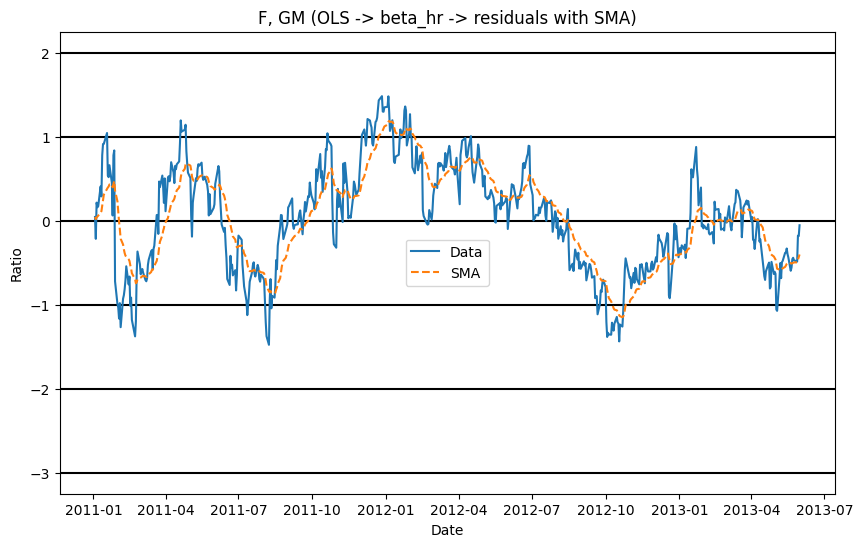

In [52]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def compute_sma(data, window_size=50):
    return data.rolling(window=window_size).mean()

def compute_ema(data, span=20):
    return data.ewm(span=span, adjust=False).mean()

def visualize_data(dates, data, sma_data, title):
    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(1, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-1, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(2, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-2, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-3, color='black') # Add horizontal line at y=0 for reference
    plt.plot(dates, data, label="Data")
    plt.plot(dates, sma_data, label="SMA", linestyle="--")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.legend()
    plt.grid(False)
    plt.show()

def main():
    # """""" \/
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2011-01-01'
    end_date = '2013-06-01'

    stock_data_1_np = get_stock_data(stock_symbol_1, start_date, end_date)
    stock_data_2_np = get_stock_data(stock_symbol_2, start_date, end_date)
    # """""" /\

    # """""" \/
    last_2_prices_x = stock_data_1_np[-2:]
    last_2_prices_y = stock_data_2_np[-2:]

    time_indices_x = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))
    time_indices_y = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))

    model_x = LinearRegression()
    model_y = LinearRegression()
    model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
    model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)

    slope_x = model_x.coef_[0]
    slope_y = model_y.coef_[0]

    signs_opposite = np.all(slope_x == -slope_y)
    # """""" /\

    # """""" \/
    model = sm.OLS(stock_data_1_np, stock_data_2_np)
    res = model.fit()
    beta_hr = res.params[0]
    residuals = stock_data_1_np - beta_hr * stock_data_2_np
    # """""" /\
    
    # Compute SMA of the residuals
    sema_res = compute_ema(residuals)
    
    title = f'{stock_symbol_1}, {stock_symbol_2} (OLS -> beta_hr -> residuals with SMA)'

    dates = stock_data_1_np.index
    visualize_data(dates, residuals, sma_res, title)

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
type(stock_data_1_np) <class 'pandas.core.series.Series'>


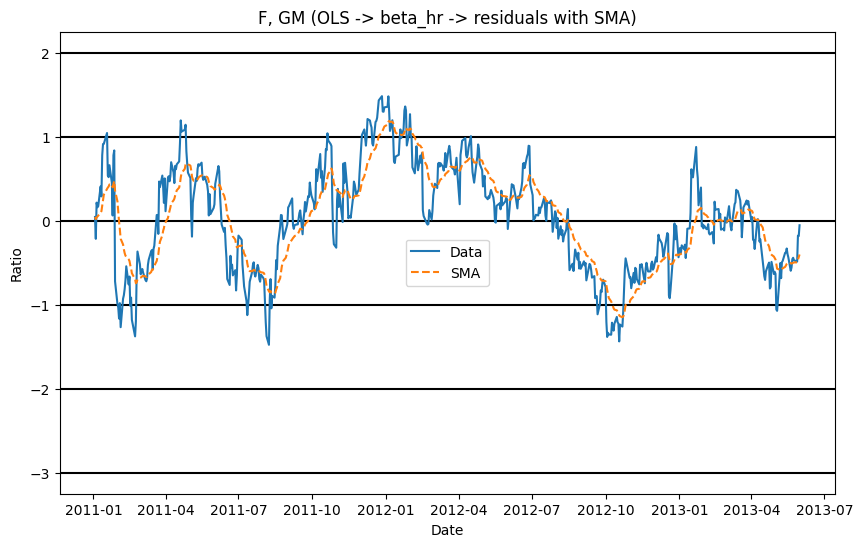

In [69]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def compute_sma(data, window_size=50):
    return data.rolling(window=window_size).mean()

def compute_ema(data, span=20):
    return data.ewm(span=span, adjust=False).mean()

def visualize_data(dates, data, sma_data, title):
    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(1, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-1, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(2, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-2, color='black') # Add horizontal line at y=0 for reference
    plt.axhline(-3, color='black') # Add horizontal line at y=0 for reference
    plt.plot(dates, data, label="Data")
    plt.plot(dates, sma_data, label="SMA", linestyle="--")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.legend()
    plt.grid(False)
    plt.show()

def main():
    # """""" \/
    stock_symbol_1 = 'F'
    stock_symbol_2 = 'GM'
    start_date = '2011-01-01'
    end_date = '2013-06-01'

    stock_data_1_np = get_stock_data(stock_symbol_1, start_date, end_date) # stock_data_1_np is type() <class 'pandas.core.series.Series'>
    stock_data_2_np = get_stock_data(stock_symbol_2, start_date, end_date)
    # """""" /\

    # """""" \/
    lin_reg_x = []
    lin_reg_y = []
    for itr in range(2, len(stock_data_1_np, stock_data_2_np)):
        last_2_prices_x = stock_data_1_np[itr-2:itr]
        last_2_prices_y = stock_data_2_np[itr-2:itr]

        time_indices_x = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))
        time_indices_y = np.arange(len(stock_data_2_np)-2, len(stock_data_2_np))

        model_x = LinearRegression()
        model_y = LinearRegression()
        model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
        model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)

        slope_x = model_x.coef_[0]
        slope_y = model_y.coef_[0]

        lin_reg_x.append(slope_x)
        lin_reg_y.append(slope_y)
    # """""" /\

    # """""" \/
    last_2_prices_x = stock_data_1_np[-2:]
    last_2_prices_y = stock_data_2_np[-2:]

    time_indices_x = np.arange(len(stock_data_1_np)-2, len(stock_data_1_np))
    time_indices_y = np.arange(len(stock_data_2_np)-2, len(stock_data_2_np))

    model_x = LinearRegression()
    model_y = LinearRegression()
    model_x.fit(time_indices_x.reshape(-1, 1), last_2_prices_x)
    model_y.fit(time_indices_y.reshape(-1, 1), last_2_prices_y)

    slope_x = model_x.coef_[0]
    slope_y = model_y.coef_[0]

    signs_opposite = np.all(slope_x == -slope_y)
    # """""" /\

    # """""" \/
    model = sm.OLS(stock_data_1_np, stock_data_2_np)
    res = model.fit()
    beta_hr = res.params[0]
    residuals = stock_data_1_np - beta_hr * stock_data_2_np
    # """""" /\
    
    # Compute SMA of the residuals
    sma_res = compute_ema(residuals)
    
    title = f'{stock_symbol_1}, {stock_symbol_2} (OLS -> beta_hr -> residuals with SMA)'

    dates = stock_data_1_np.index
    visualize_data(dates, residuals, sma_res, title)

if __name__ == "__main__":
    main()
